In [2]:
import numpy as np
import pandas as pd
import os
import time
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<h3> 1. Read Data set </h3>

In [44]:
#Specify the input path of the data set
input_path = "gs://agriculture-sara/Test_ebr.csv"
df = pd.read_csv(input_path, delimiter=',')
df.head()

#Specify columns to drop
columnsToDrop = ['Date', 'Site Id','Year','Month','Day','LE_bowen_corr(mm)',
                 'G','G-1','G-2','G-3','G-4','G-5',
                 'H','H_ebr_corr','H_ebr_corr-1','H_ebr_corr-2','H_ebr_corr-3','H_ebr_corr-4','H_ebr_corr-5',
                 'NETRAD','NETRAD-1','NETRAD-2','NETRAD-3','NETRAD-4','NETRAD-5',
                 'LE','LE_ebr_corr','ET_ebr','ET_ebr_corr','ET_ebr_corr(mm)','ETrF',
                 'Elevation','Longitude','Latitude','Climate','Vegetation',
                 'H_bowen_corr','H_bowen_corr-1','H_bowen_corr-2','H_bowen_corr-3',
                 'H_bowen_corr-4','H_bowen_corr-5', 'LE_bowen_corr','ET_bowen',
                 'ET_bowen_corr','ET_bowen_corr(mm)']

df = df.drop(columnsToDrop, axis = 1)
#Drop NaN values
df.dropna(inplace=True)

#Rename variables with spacing and under score for better proper namings
df.rename(columns={"Site Id_1": "Site_1", "Site Id_2": "Site_2",
                  "Site Id_3": "Site_3", "Site Id_4": "Site_4",
                  "Site Id_5": "Site_5", "Site Id_6": "Site_6"}, inplace=True)

#Specify the output column
output_column = "LE_ebr_corr(mm)"

In [57]:
input_path = "gs://agriculture-sara/Generated Clusters/Dendograms-AHC/Unscaled/AHC_2.csv"

df = pd.read_csv(input_path, delimiter=',')
df.head()

#Drop NaN values
df.dropna(inplace=True)

#Specify columns to drop
columnsToDrop = ['Date', 'Site Id','Year','Month','Day',
                 'G','G-1','G-2','G-3','G-4','G-5',
                 'H', 'H_CORRECTED-1', 'H_CORRECTED-2', 'H_CORRECTED-3', 'H_CORRECTED-4',
                 'H_CORRECTED-5',
                 'NETRAD','NETRAD-1','NETRAD-2','NETRAD-3','NETRAD-4','NETRAD-5',
                 'LE', 'LE_CORRECTED(mm)-1', 'LE_CORRECTED(mm)-2', 'LE_CORRECTED(mm)-3', 'LE_CORRECTED(mm)-4',
                'LE_CORRECTED(mm)-5']

df = df.drop(columnsToDrop, axis = 1)


#Rename variables with spacing and under score for better proper namings
df.rename(columns={"Site Id_1": "Site_1", "Site Id_2": "Site_2",
                  "Site Id_3": "Site_3", "Site Id_4": "Site_4",
                  "Site Id_5": "Site_5", "Site Id_6": "Site_6"}, inplace=True)

#Specify the output column
output_column = "LE_CORRECTED(mm)"

df.head()

WS         RH         TA  H_CORRECTED  LE_CORRECTED  \
5  3.903800  60.438571  27.582857     5.614436    110.478595   
6  4.298700  59.498333  26.320000    31.380274    105.994995   
7  2.253425  46.785000  27.570000    63.059422    117.634143   
8  3.479233  40.526667  30.296667    23.855558     78.158839   
9  3.110500  54.127143  16.420000    76.659121     35.625825   

   LE_CORRECTED(mm)  C_BOWENS  Climate_1  Climate_2  Climate_3  ...      WS-1  \
5          3.817505  0.712355          0          0          1  ...  2.963250   
6          3.662578  0.709945          0          0          1  ...  3.903800   
7          4.064760  0.835657          0          0          1  ...  4.298700   
8          2.700720  0.791809          0          0          1  ...  2.253425   
9          1.231024  0.942033          0          0          1  ...  3.479233   

       WS-2      WS-3      WS-4      WS-5        H-1        H-2        H-3  \
5  3.269375  2.512043  4.161980  2.907342  14.410950  64.466000  -2.344986   
6  2.963250  3.269375  2.512043  4.161980   3.999471  14.410950  64.466000   
7  3.903800  2.963250  3.269375  2.512043  22.278283   3.999471  14.410950   
8  4.298700  3.903800  2.963250  3.269375  52.696050  22.278283   3.999471   
9  2.253425  4.298700  3.903800  2.963250  18.889033  52.696050  22.278283   

         H-4        H-5  
5  41.733325  37.637575  
6  -2.344986  41.733325  
7  64.466000  -2.344986  
8  14.410950  64.466000  
9   3.999471  14.410950  

[5 rows x 40 columns]

<h3> 2. Compute the average of certain columns </h3>

In [58]:
def get_matching_columns(keyword):
    '''
    This function will get all matching columns with the keyword being sent
    '''
    return [col for col in df.columns if keyword in col]

rh_columns = get_matching_columns("RH-")
ws_columns = get_matching_columns("WS-")
ta_columns = get_matching_columns("TA-")

#Compute the average for the lags of RH, WS, and TA
df['RH_avg'] = df[rh_columns].mean(axis=1)
df['WS_avg'] = df[ws_columns].mean(axis=1)
df['TA_avg'] = df[ta_columns].mean(axis=1)

print(rh_columns, ws_columns, ta_columns)
print(df.columns)

['RH-1', 'RH-2', 'RH-3', 'RH-4', 'RH-5'] ['WS-1', 'WS-2', 'WS-3', 'WS-4', 'WS-5'] ['TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5']
Index(['WS', 'RH', 'TA', 'H_CORRECTED', 'LE_CORRECTED', 'LE_CORRECTED(mm)',
       'C_BOWENS', 'Climate_1', 'Climate_2', 'Climate_3', 'Site_1', 'Site_2',
       'Site_3', 'Site_4', 'Site_5', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Cluster', 'RH-1', 'RH-2', 'RH-3', 'RH-4', 'RH-5', 'TA-1',
       'TA-2', 'TA-3', 'TA-4', 'TA-5', 'WS-1', 'WS-2', 'WS-3', 'WS-4', 'WS-5',
       'H-1', 'H-2', 'H-3', 'H-4', 'H-5', 'RH_avg', 'WS_avg', 'TA_avg'],
      dtype='object')


<h3> 3. Visualize Data set </h3>

In [59]:
#Visualize the data set having the weather parameters, their average, and the output column
df_temp = df[["RH", "WS", "TA", "RH_avg", "WS_avg", "TA_avg", output_column]]
df_temp.head()

RH        WS         TA     RH_avg    WS_avg     TA_avg  \
5  60.438571  3.903800  27.582857  62.703038  3.162798  28.195486   
6  59.498333  4.298700  26.320000  62.847252  3.362090  27.576057   
7  46.785000  2.253425  27.570000  62.999119  3.389434  26.043357   
8  40.526667  3.479233  30.296667  58.245548  3.337710  25.961071   
9  54.127143  3.110500  16.420000  53.904714  3.379682  26.330905   

   LE_CORRECTED(mm)  
5          3.817505  
6          3.662578  
7          4.064760  
8          2.700720  
9          1.231024

<h3> 4. Specify the columns to study and the range </h3>

In [60]:
#Specify input features column
features_to_visualize = ["RH", "WS", "TA", "RH_avg", "WS_avg", "TA_avg"]
#Specify output column
target_to_visualize = output_column

#Take only the specified input and output columns
columns = features_to_visualize
columns.append(target_to_visualize)
df = df[columns]

#Divide the data into ranges
start_index, end_index = 1, 3
df_ranged = df[df[target_to_visualize].between(start_index, end_index)]

<h3> 5. Summary Statisctis of the columns </h3>

In [61]:
df_ranged.describe()

RH          WS          TA      RH_avg      WS_avg      TA_avg  \
count  706.000000  706.000000  706.000000  706.000000  706.000000  706.000000   
mean    65.330602    2.115788   21.476670   61.483456    2.101797   22.878662   
std     15.473924    0.872240    4.255403   10.461323    0.675579    3.446017   
min     23.470050    0.000000    9.243789   30.698084    0.255661   13.475290   
25%     53.997644    1.433788   18.711338   53.346268    1.549856   20.365442   
50%     65.146194    1.997533   21.594777   60.927737    2.018826   22.707993   
75%     78.132010    2.656730   24.213437   68.950398    2.579586   25.320086   
max     98.285125    4.991396   35.480000   89.764251    4.256916   33.178965   

       LE_CORRECTED(mm)  
count        706.000000  
mean           2.044721  
std            0.568699  
min            1.001170  
25%            1.569379  
50%            2.052119  
75%            2.546192  
max            2.999421

<h3> 6. Plot histograms for specified columns </h3>

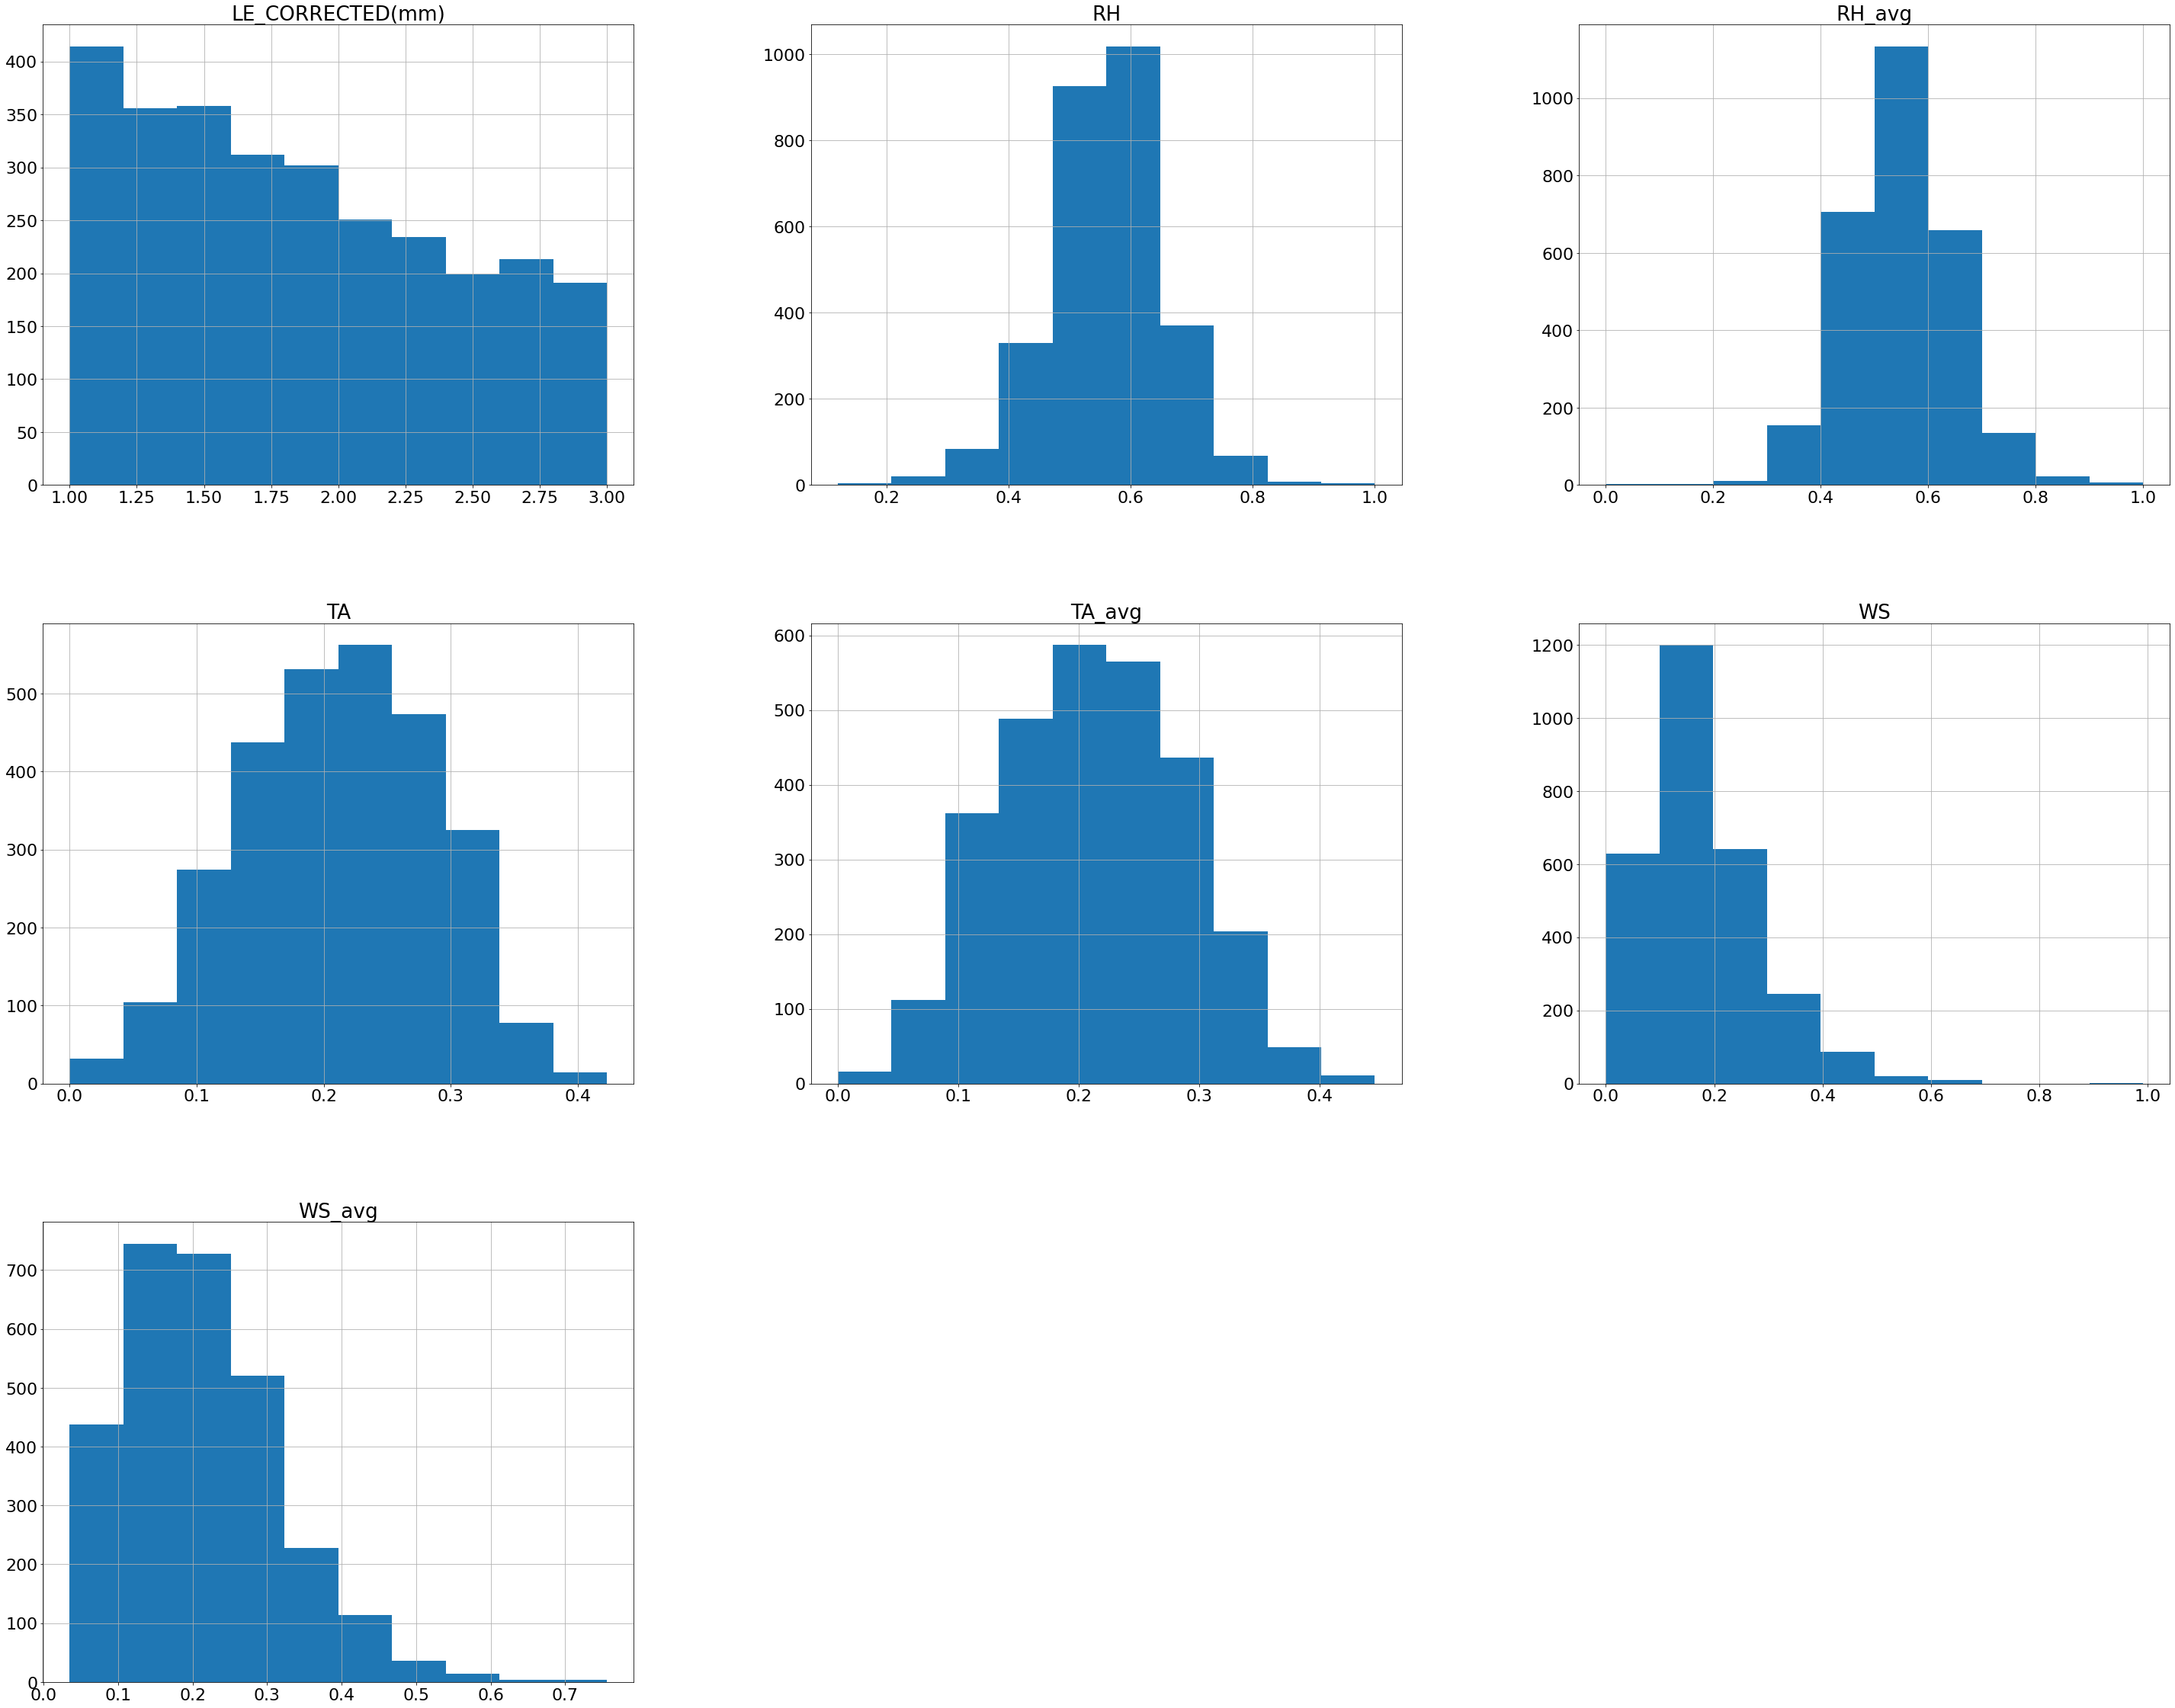

In [13]:
df_ranged.hist(figsize=(50, 40)) 
#Increasing font size
plt.rcParams.update({'font.size': 22})

<h3> 7. Repeat procedure for a set of output ranges </h3>

Full data


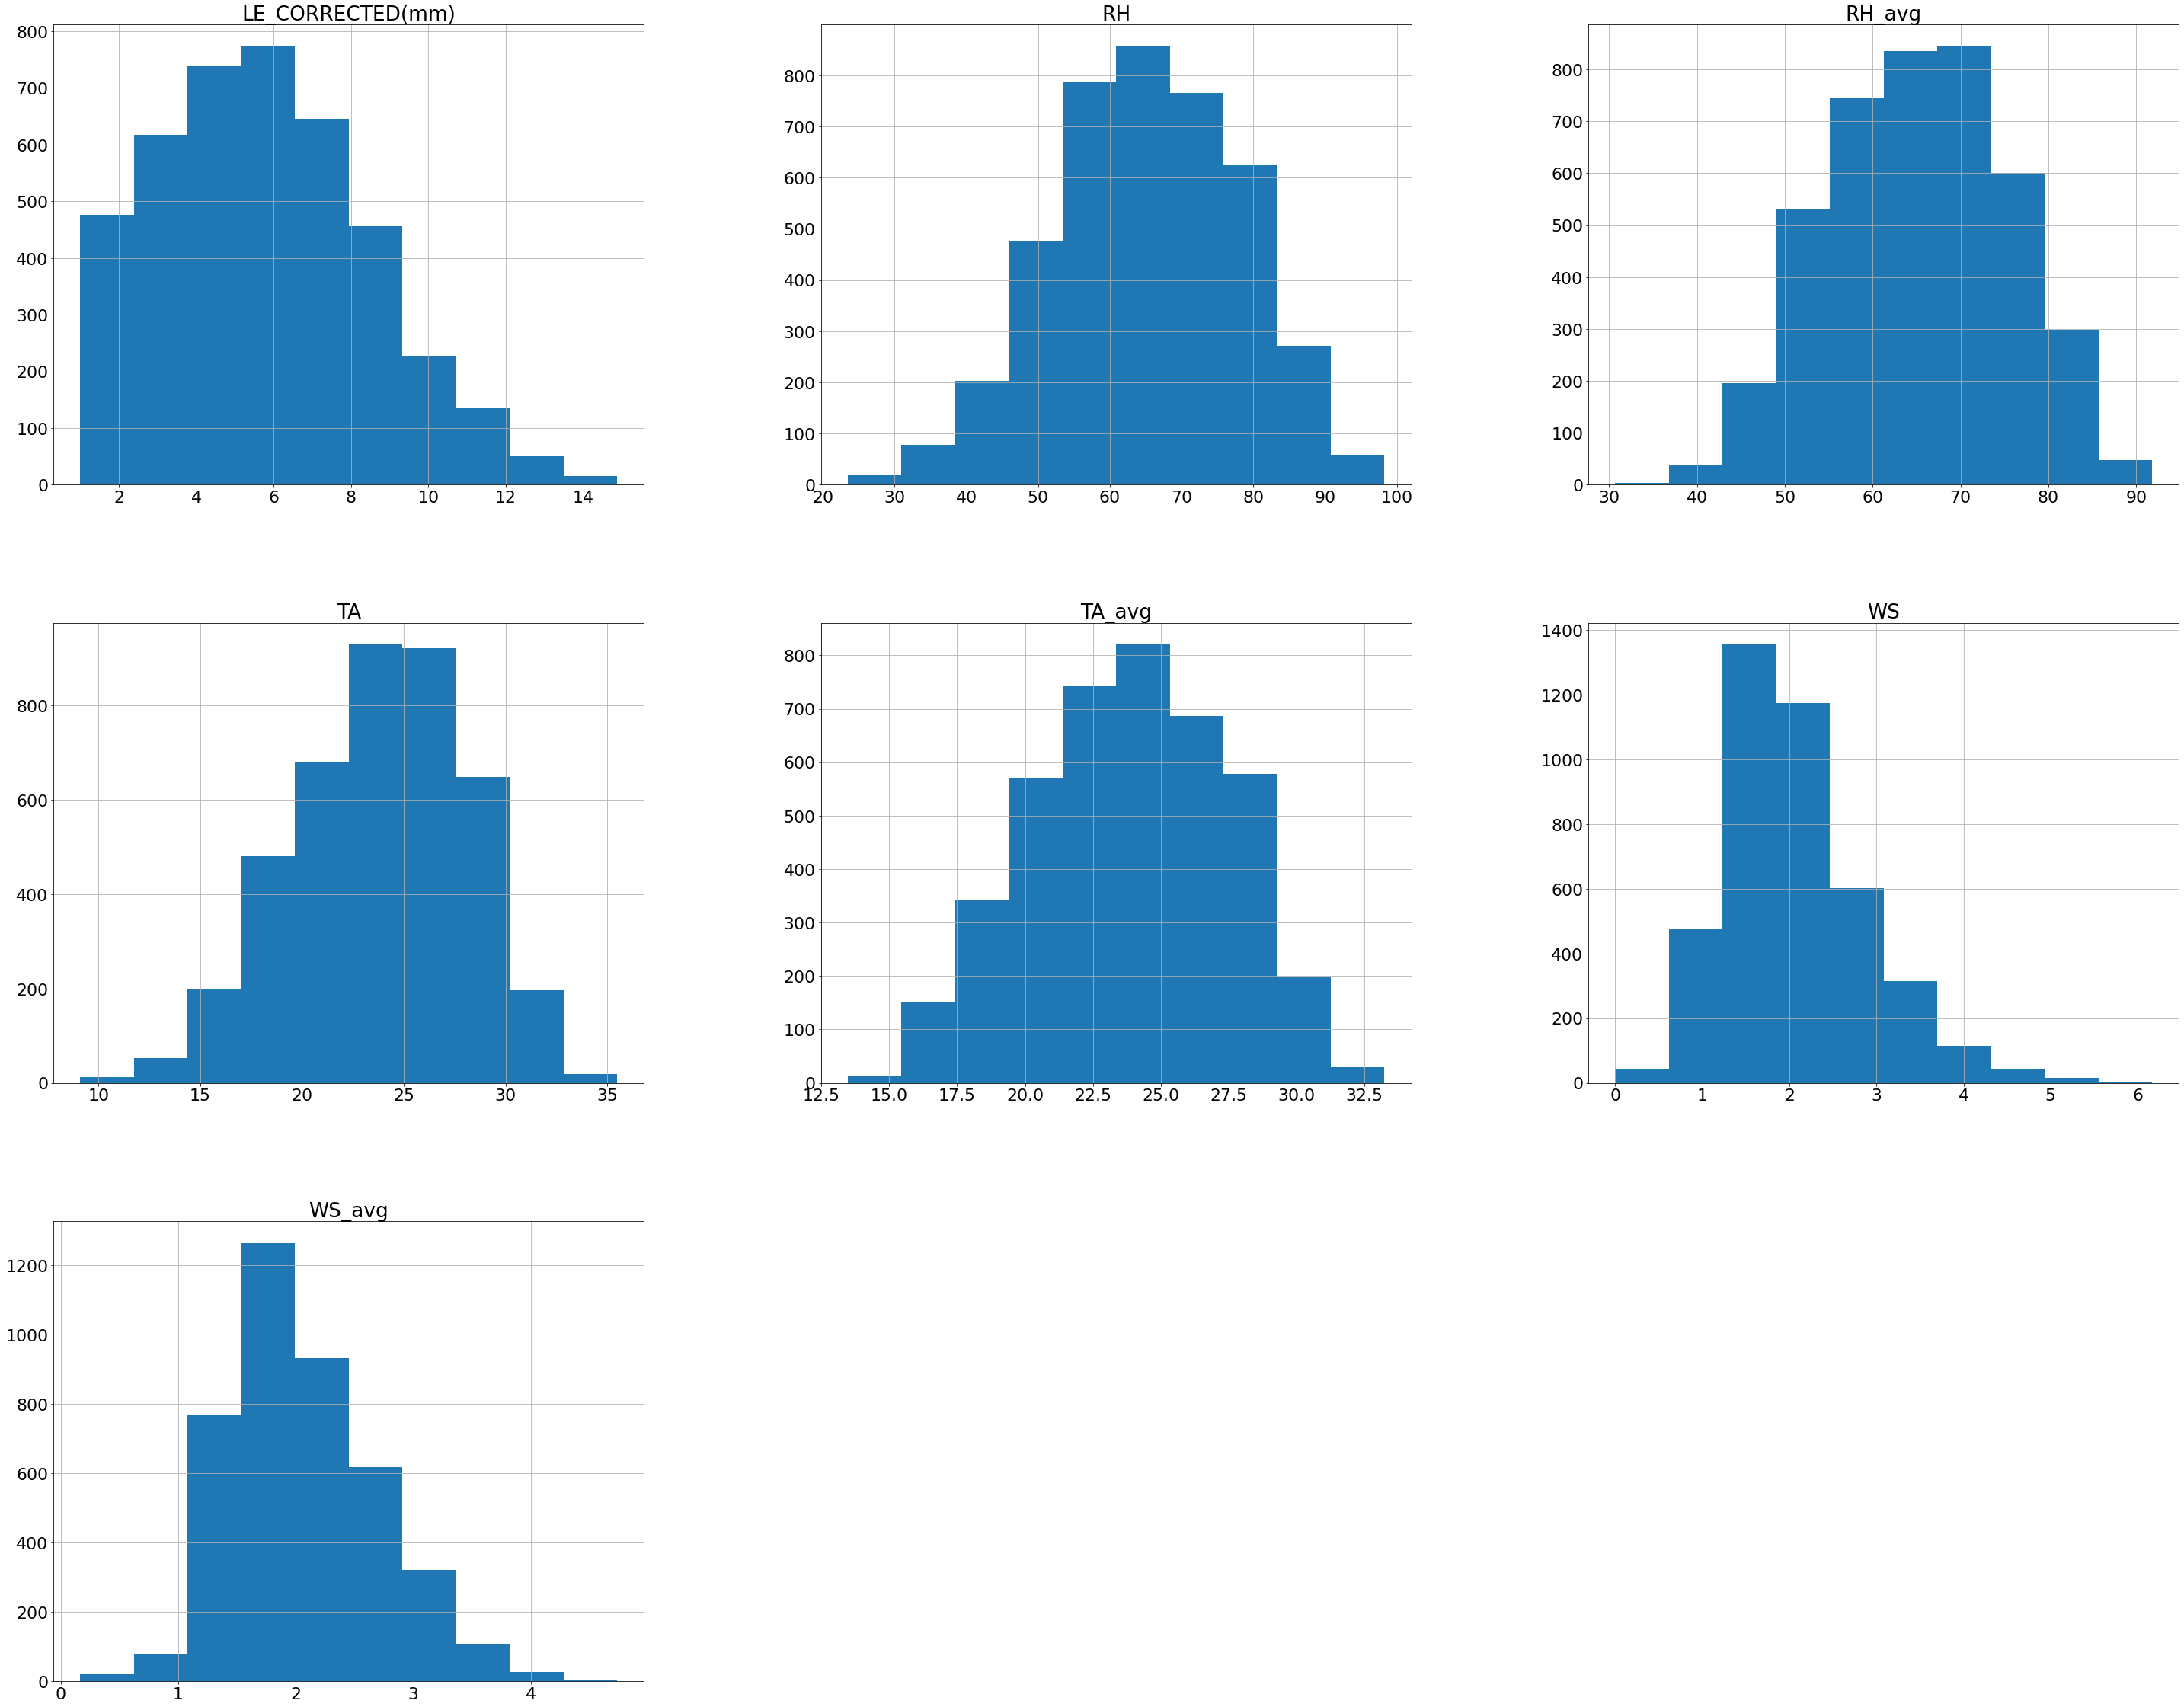

In [62]:
def divide_data_set_by_range(df, start_index, end_index, show_all_data = False):
    if not show_all_data:
        #Divide the data into ranges
        df_ranged = df[df[target_to_visualize].between(start_index, end_index)]
    else:
        df_ranged = df
    df_ranged.hist(figsize=(50, 40)) 
    plt.show()
    
#Specify the ranges of start and end index in here
ranges_list = []
# ranges_list = [
#     {
#         "start_index": 1,
#         "end_index": 3
#     },
#     {
#         "start_index": 3,
#         "end_index": 5
#     },
#     {
#         "start_index": 5,
#         "end_index": 7
#     },
#     {
#         "start_index": 7,
#         "end_index": 10
#     },
#     {
#         "start_index": 10,
#         "end_index": 15
#     }
# ]

if len(ranges_list) > 0:
    for i in range(len(ranges_list)):
        current_range = ranges_list[i]
        print("Range:", current_range)
        divide_data_set_by_range(df, current_range["start_index"], current_range["end_index"])
        print("------------------------------------------------------------------------------------------------")
else:
    #Show all data
    print("Full data")
    divide_data_set_by_range(df, 0, 1, show_all_data = True)